In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
# training set
x1 =  np.random.uniform(6,size = 100) # x1 between [0,6]
x1 = np.around(x1, 2)
x2 =  np.random.uniform(6,size = 100) # x2 between [0,6]
x2 = np.around(x2, 2)
x3 =  np.random.uniform(-6, 0 ,size = 100) # x3 between [-6,0]
x3 = np.around(x3, 2)
x4 =  np.random.uniform(-6, 0, size = 100) # x4 between [-6,0]
x4 = np.around(x4, 2)

dataset_0_0 = pd.DataFrame({'x1': x1[ : 50], 'x2': x2[ : 50], 'y': [0]*50})
# dataset_0_0
dataset_0_1 = pd.DataFrame({'x1': x1[50 : ], 'x2': x4[ : 50], 'y': [1]*50})
# print(dataset_0_1)
dataset_1_0 = pd.DataFrame({'x1': x3[ : 50], 'x2': x2[50 : ], 'y': [1]*50})
# dataset_1_0
dataset_1_1 = pd.DataFrame({'x1': x3[50 : ], 'x2': x4[50 : ], 'y': [0]*50})
# dataset_1_1
train_data = pd.concat([dataset_0_0, dataset_0_1, dataset_1_0, dataset_1_1])
# randomly shuffled the train_data
# train_data = train_data.sample(frac = 1).reset_index(drop = True)
train_data

,x1,x2,y
0,3.91,4.37,0
1,2.40,3.36,0
2,6.00,1.57,0
3,4.49,4.21,0
4,5.27,1.46,0
...,...,...,...
45,-5.59,-0.94,0
46,-3.73,-3.71,0
47,-5.52,-1.50,0
48,-0.10,-2.93,0


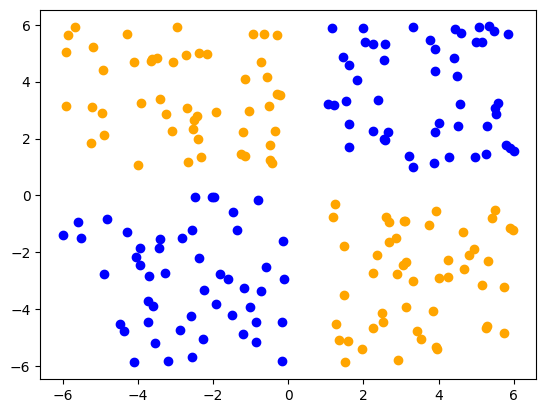

In [3]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(train_data['x1'][train_data['y'] == 0], train_data['x2'][train_data['y'] == 0], color = 'blue')
ax.scatter(train_data['x1'][train_data['y'] == 1], train_data['x2'][train_data['y'] == 1], color = 'orange')

In [4]:
np.random.seed(20)
# test set
x1 =  np.random.uniform(6,size = 100) # x1 between [0,6]
x1 = np.around(x1, 2)
x2 =  np.random.uniform(6,size = 100) # x2 between [0,6]
x2 = np.around(x2, 2)
x3 =  np.random.uniform(-6, 0 ,size = 100) # x3 between [-6,0]
x3 = np.around(x3, 2)
x4 =  np.random.uniform(-6, 0, size = 100) # x4 between [-6,0]
x4 = np.around(x4, 2)

dataset_0_0 = pd.DataFrame({'x1': x1[ : 50], 'x2': x2[ : 50], 'y1': [0]*50})
# dataset_0_0
dataset_0_1 = pd.DataFrame({'x1': x1[50 : ], 'x2': x4[ : 50], 'y1': [1]*50})
# dataset_0_1
dataset_1_0 = pd.DataFrame({'x1': x3[ : 50], 'x2': x2[50 : ], 'y1': [1]*50})
# dataset_1_0
dataset_1_1 = pd.DataFrame({'x1': x3[50 : ], 'x2': x4[50 : ], 'y1': [0]*50})
# dataset_1_1
test_data = pd.concat([dataset_0_0, dataset_0_1, dataset_1_0, dataset_1_1])
# randomly shuffled the test_data
# test_data = test_data.sample(frac= 1).reset_index(drop= True)
# test_data

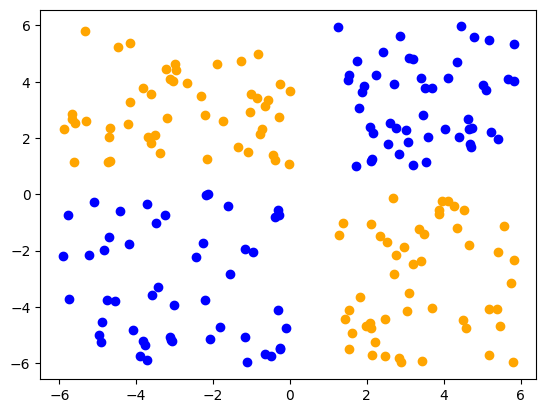

In [5]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(test_data['x1'][test_data['y1'] == 0], test_data['x2'][test_data['y1'] == 0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1'] == 1], test_data['x2'][test_data['y1'] == 1], color = 'orange')

In [6]:
# # Define the MLP model
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, 2)
#         self.fc3 = nn.Linear(2, 1)
#         self.sigmoid = nn.Sigmoid()



#     def forward(self, x):
#         out = self.fc1(x)
#         out = self.sigmoid(out)
#         out = self.fc2(out)
#         out = self.fc3(out)
#         out = self.sigmoid(out)
#         return out


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()



    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [7]:
# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [8]:
# Shuffle train and test data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

# Define features and target variable
X_train = train_data[['x1', 'x2']].values.astype(np.float32)
y_train = train_data['y'].values.reshape(-1, 1).astype(np.float32)
X_test = test_data[['x1', 'x2']].values.astype(np.float32)
y_test = test_data['y1'].values.reshape(-1, 1).astype(np.float32)

# Create DataLoader
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=200, shuffle=True)

In [9]:
# Initialize the model, loss function, and optimizer
model = MLP(input_size=2, hidden_size=4)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)
model

MLP(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [10]:
# baseline accuracy and loss
accuracy, train_loss = 0, 0
for inputs, labels in train_loader:
    outputs = model(inputs)
    output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
    accuracy += torch.sum(output_labels == labels)
    loss = criterion(outputs, labels)
    train_loss += loss.item()

print(f'Baseline accuracy {accuracy / len(train_loader.dataset)}, baseline loss {train_loss/len(train_loader)}')

Baseline accuracy 0.6000000238418579, baseline loss 0.694368302822113


In [11]:
# Training loop
epochs = 1000
train_losses = []
for epoch in range(epochs):
    train_loss = 0.0
    accuracy = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        accuracy += torch.sum(output_labels == labels)
        loss = criterion(outputs, labels)
        # print('Loss: ', loss)
        loss.backward()
        optimizer.step()
        # train_loss += loss.item() * inputs.size(0)
        train_loss += loss.item()

    if epoch % 100 ==0:
        print(f'Epoch {epoch} Accuracy {accuracy/len(train_loader.dataset):.4f}')

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

# print(torch.hstack([inputs, outputs, output_labels, labels]))
total_train_loss = np.mean(train_losses)
print(f'Training loss: {total_train_loss:.4f}')

Epoch 0 Accuracy 0.6000
Epoch 100 Accuracy 0.9750
Epoch 200 Accuracy 1.0000
Epoch 300 Accuracy 1.0000
Epoch 400 Accuracy 1.0000
Epoch 500 Accuracy 1.0000
Epoch 600 Accuracy 1.0000
Epoch 700 Accuracy 1.0000
Epoch 800 Accuracy 1.0000
Epoch 900 Accuracy 1.0000
Training loss: 0.0977


In [12]:
test_loss = 0.0
accuracy = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        # print(torch.hstack([inputs, outputs, output_labels, labels]))
        accuracy += torch.sum(output_labels == labels)
        loss = criterion(outputs, labels)
        # test_loss += loss.item() * inputs.size(0)
        test_loss += loss.item()
test_loss /= len(test_loader)
print(f'Test loss: {test_loss:.4f}, accuracy: {accuracy/len(test_loader.dataset):.4f}')

Test loss: 0.0341, accuracy: 0.9950


In [13]:
input = torch.tensor([0.23, -0.45])
output = model(input)
print(output)

tensor([0.6495], grad_fn=<SigmoidBackward0>)


In [14]:
xx = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
yy = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)
xx, yy = torch.meshgrid(xx, yy)
xx1 = xx.reshape(-1, 1)
yy1 = yy.reshape(-1, 1)
data = torch.hstack([xx1,yy1])
z = model(data)
z = torch.where(z > 0.5, 1, 0)
z = z.reshape(13,13)
# torch.hstack([xx, yy, z])

<ipython-input-14-27ad44283454>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
<ipython-input-14-27ad44283454>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yy = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Decision surface of MLP

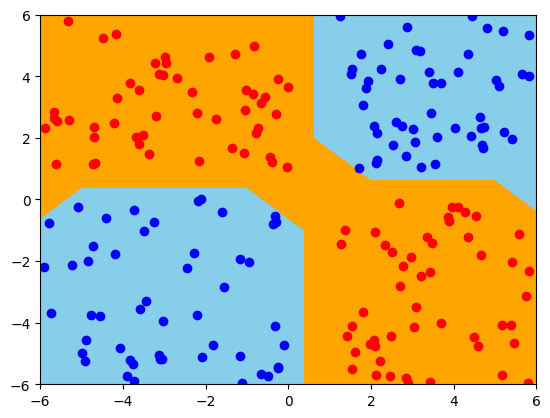

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red')

MLP with L1 regularisation

In [16]:
# Define the MLP model
class MLP_L2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP_L2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()



    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [17]:
# 5-fold cross validation
K = 5
epochs = 1000
block = len(train_data) // K
valid_loss_acc = {}

for learning_rate in [0.003,0.01, 0.03, 0.1, 0.3, 1]:
    for lagrange_multiplier in [0.001, 0.003, 0.01, 0.03, 0.1]:
        k_cross_val_loss = []
        k_cross_val_acc = []
        for i in range(K):
            start = i * block
            end = start + block
            val_dataset = train_data[start : end].reset_index(drop = True)
            X_val = val_dataset[['x1', 'x2']].values.astype(np.float32)
            y_val = val_dataset['y'].values.reshape(-1, 1).astype(np.float32)
            val_dataset = CustomDataset(X_val, y_val)
            val_loader = DataLoader(val_dataset, batch_size=40, shuffle=True)

            Xy_train = pd.concat([train_data[ : start], train_data[end : ]], axis = 0).reset_index(drop = True)
            X_train = Xy_train[['x1', 'x2']].values.astype(np.float32)
            y_train = Xy_train['y'].values.reshape(-1, 1).astype(np.float32)
            train_dataset = CustomDataset(X_train, y_train)
            train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)

            # initialise MLP
            model = MLP_L2(input_size=2, hidden_size=4)
            criterion = nn.BCELoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            # training the model
            train_losses = []
            for epoch in range(epochs):
                train_loss = 0.0
                accuracy = 0
                for inputs, labels in train_loader:
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
                    accuracy += torch.sum(output_labels == labels)
                    loss = criterion(outputs, labels)

                    sum = 0
                    for params in model.parameters():
                        params = params.view(-1)
                        sum += torch.sum(abs(params))

                    loss += lagrange_multiplier * sum
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item()

                if epoch % 100 == 0:
                    print(f'Epoch {epoch} Accuracy {accuracy/len(train_loader.dataset):.4f}')

                train_loss /= len(train_loader)
                train_losses.append(train_loss)

            # print(torch.hstack([inputs, outputs, output_labels, labels]))
            total_train_loss = np.mean(train_losses)
            print(f'In {i+1} Cross validation, Training loss: {total_train_loss:.4f}')


            # validate
            val_loss = 0.0
            accuracy = 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    outputs = model(inputs)
                    output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
                    # print(torch.hstack([inputs, outputs, output_labels, labels]))
                    accuracy += torch.sum(output_labels == labels)

                    loss = criterion(outputs, labels)
                    for params in model.parameters():
                        params = params.view(-1)
                        sum += torch.sum(abs(params))
                    loss += lagrange_multiplier * sum

                    val_loss += loss.item()

            k_cross_val_loss.append(val_loss/len(val_loader))
            k_cross_val_acc.append(accuracy/len(val_dataset))
            print(f'Validation loss: {val_loss/len(val_loader):.4f}, Validation accuracy: {accuracy/len(val_dataset):.4f}')

        valid_loss_acc[f'{learning_rate}_{lagrange_multiplier}_loss'] = np.mean(k_cross_val_loss)
        valid_loss_acc[f'{learning_rate}_{lagrange_multiplier}_acc'] = np.mean(k_cross_val_acc)

Epoch 0 Accuracy 0.5437
Epoch 100 Accuracy 0.6000
Epoch 200 Accuracy 0.7750
Epoch 300 Accuracy 0.8438
Epoch 400 Accuracy 0.8250
Epoch 500 Accuracy 0.8625
Epoch 600 Accuracy 0.8625
Epoch 700 Accuracy 0.8562
Epoch 800 Accuracy 0.8562
Epoch 900 Accuracy 0.8500
In 1 Cross validation, Training loss: 0.5138
Validation loss: 0.2800, Validation accuracy: 0.9250
Epoch 0 Accuracy 0.4688
Epoch 100 Accuracy 0.4750
Epoch 200 Accuracy 0.5938
Epoch 300 Accuracy 0.8813
Epoch 400 Accuracy 0.9312
Epoch 500 Accuracy 0.9625
Epoch 600 Accuracy 0.9875
Epoch 700 Accuracy 0.9937
Epoch 800 Accuracy 0.9937
Epoch 900 Accuracy 0.9937
In 2 Cross validation, Training loss: 0.4561
Validation loss: 0.2707, Validation accuracy: 1.0000
Epoch 0 Accuracy 0.4812
Epoch 100 Accuracy 0.5125
Epoch 200 Accuracy 0.5437
Epoch 300 Accuracy 0.7312
Epoch 400 Accuracy 0.9250
Epoch 500 Accuracy 0.9625
Epoch 600 Accuracy 0.9875
Epoch 700 Accuracy 0.9875
Epoch 800 Accuracy 0.9875
Epoch 900 Accuracy 0.9937
In 3 Cross validation, Trainin

In [18]:
t = pd.DataFrame(valid_loss_acc, index = ['val']).T
t['val'] = t['val'].apply(lambda x: round(x, 2))
t

,val
0.003_0.001_loss,0.30
0.003_0.001_acc,0.97
0.003_0.003_loss,0.51
0.003_0.003_acc,0.79
0.003_0.01_loss,0.70
0.003_0.01_acc,0.43
0.003_0.03_loss,0.69
0.003_0.03_acc,0.45
0.003_0.1_loss,0.69
0.003_0.1_acc,0.43


In [19]:
model = MLP_L2(input_size=2, hidden_size=4)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)
lagrange_multiplier = 0.001

# training the model
for epoch in range(epochs): #No of epochs 1000
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        sum = 0
        for params in model.parameters():
            params = params.view(-1)
            sum += torch.sum(abs(params))

        loss += lagrange_multiplier * sum
        loss.backward()
        optimizer.step()


In [20]:
X_test = test_data[['x1', 'x2']].values.astype(np.float32)
y_test = test_data['y1'].values.reshape(-1, 1).astype(np.float32)
test_dataset = CustomDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=200, shuffle=True)

test_loss = 0.0
accuracy = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        # print(torch.hstack([inputs, outputs, output_labels, labels]))
        accuracy += torch.sum(output_labels == labels)
        loss = criterion(outputs, labels)
        # test_loss += loss.item() * inputs.size(0)
        test_loss += loss.item()
test_loss /= len(test_loader)
print(f'Test loss: {test_loss:.4f}, accuracy: {accuracy/len(test_loader.dataset):.4f}')

Test loss: 0.2791, accuracy: 0.8950


<ipython-input-21-39bd29e93d33>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
<ipython-input-21-39bd29e93d33>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)


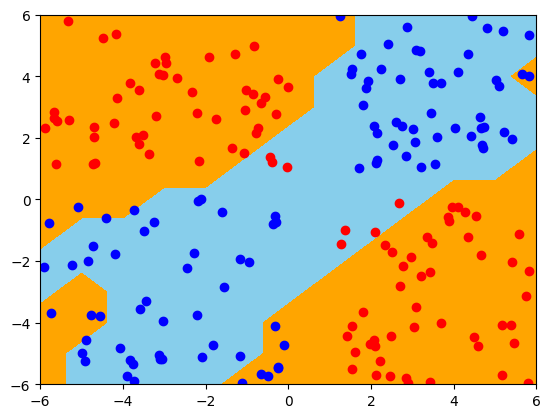

In [21]:
xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)
xx1, xx2 = torch.meshgrid(xx1, xx2)
xx1 = xx1.reshape(-1, 1)
xx2 = xx2.reshape(-1, 1)
data = torch.hstack([xx1,xx2])
z = model(data)
z = torch.where(z > 0.5, 1, 0)
z = z.reshape(13,13)

fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red')

MLP with L2 Regularisation

In [22]:
# Define the MLP model
class MLP_L2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP_L2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()



    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [23]:
# 5-fold cross validation
K = 5
epochs = 1000
block = len(train_data) // K
valid_loss_acc = {}

for learning_rate in [0.03]:
    for lagrange_multiplier in [0.001, 0.003, 0.01, 0.03, 0.1]:
        k_cross_val_loss = []
        k_cross_val_acc = []
        for i in range(K):
            start = i * block
            end = start + block
            val_dataset = train_data[start : end].reset_index(drop = True)
            X_val = val_dataset[['x1', 'x2']].values.astype(np.float32)
            y_val = val_dataset['y'].values.reshape(-1, 1).astype(np.float32)
            val_dataset = CustomDataset(X_val, y_val)
            val_loader = DataLoader(val_dataset, batch_size=40, shuffle=True)

            Xy_train = pd.concat([train_data[ : start], train_data[end : ]], axis = 0).reset_index(drop = True)
            X_train = Xy_train[['x1', 'x2']].values.astype(np.float32)
            y_train = Xy_train['y'].values.reshape(-1, 1).astype(np.float32)
            train_dataset = CustomDataset(X_train, y_train)
            train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)

            # initialise MLP
            model = MLP_L2(input_size=2, hidden_size=4)
            criterion = nn.BCELoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            # training the model
            train_losses = []
            for epoch in range(epochs):
                train_loss = 0.0
                accuracy = 0
                for inputs, labels in train_loader:
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
                    accuracy += torch.sum(output_labels == labels)
                    loss = criterion(outputs, labels)

                    sum = 0
                    for params in model.parameters():
                        params = params.view(-1)
                        params = torch.square(params)
                        sum += torch.sum(params)

                    loss += lagrange_multiplier * sum
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item()

                if epoch % 20 == 0:
                    print(f'Epoch {epoch} Accuracy {accuracy/len(train_loader.dataset):.4f}')

                train_loss /= len(train_loader)
                train_losses.append(train_loss)

            # print(torch.hstack([inputs, outputs, output_labels, labels]))
            total_train_loss = np.mean(train_losses)
            print(f'In {i+1} Cross validation, Training loss: {total_train_loss:.4f}')


            # validate
            val_loss = 0.0
            accuracy = 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    outputs = model(inputs)
                    output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
                    # print(torch.hstack([inputs, outputs, output_labels, labels]))
                    accuracy += torch.sum(output_labels == labels)

                    loss = criterion(outputs, labels)
                    for params in model.parameters():
                        params = params.view(-1)
                        params = torch.square(params)
                        sum += torch.sum(params)
                    loss += lagrange_multiplier * sum

                    val_loss += loss.item()

            k_cross_val_loss.append(val_loss/len(val_loader))
            k_cross_val_acc.append(accuracy/len(val_dataset))
            print(f'Validation loss: {val_loss/len(val_loader):.4f}, Validation accuracy: {accuracy/len(val_dataset):.4f}')

        valid_loss_acc[f'{learning_rate}_{lagrange_multiplier}_loss'] = np.mean(k_cross_val_loss)
        valid_loss_acc[f'{learning_rate}_{lagrange_multiplier}_acc'] = np.mean(k_cross_val_acc)







Epoch 0 Accuracy 0.5063
Epoch 20 Accuracy 0.8250
Epoch 40 Accuracy 0.8687
Epoch 60 Accuracy 0.8750
Epoch 80 Accuracy 0.9125
Epoch 100 Accuracy 0.9250
Epoch 120 Accuracy 0.9312
Epoch 140 Accuracy 0.9438
Epoch 160 Accuracy 0.9438
Epoch 180 Accuracy 0.9500
Epoch 200 Accuracy 0.9625
Epoch 220 Accuracy 0.9625
Epoch 240 Accuracy 0.9625
Epoch 260 Accuracy 0.9688
Epoch 280 Accuracy 0.9688
Epoch 300 Accuracy 0.9688
Epoch 320 Accuracy 0.9688
Epoch 340 Accuracy 0.9688
Epoch 360 Accuracy 0.9688
Epoch 380 Accuracy 0.9688
Epoch 400 Accuracy 0.9625
Epoch 420 Accuracy 0.9625
Epoch 440 Accuracy 0.9625
Epoch 460 Accuracy 0.9625
Epoch 480 Accuracy 0.9625
Epoch 500 Accuracy 0.9625
Epoch 520 Accuracy 0.9625
Epoch 540 Accuracy 0.9625
Epoch 560 Accuracy 0.9625
Epoch 580 Accuracy 0.9625
Epoch 600 Accuracy 0.9625
Epoch 620 Accuracy 0.9625
Epoch 640 Accuracy 0.9625
Epoch 660 Accuracy 0.9625
Epoch 680 Accuracy 0.9625
Epoch 700 Accuracy 0.9625
Epoch 720 Accuracy 0.9625
Epoch 740 Accuracy 0.9625
Epoch 760 Accuracy

In [24]:
pd.DataFrame(valid_loss_acc, index = ['val']).T

,val
0.03_0.001_loss,0.400959
0.03_0.001_acc,0.990000
0.03_0.003_loss,0.629832
0.03_0.003_acc,0.955000
0.03_0.01_loss,0.793451
0.03_0.01_acc,0.855000
0.03_0.03_loss,0.699965
0.03_0.03_acc,0.430000
0.03_0.1_loss,0.698564
0.03_0.1_acc,0.430000


In [25]:
model = MLP_L2(input_size=2, hidden_size=4)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)
lagrange_multiplier = 0.001

# training the model
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        sum = 0
        for params in model.parameters():
            params = params.view(-1)
            params = torch.square(params)
            sum += torch.sum(params)

        loss += lagrange_multiplier * sum
        loss.backward()
        optimizer.step()


In [26]:
X_test = test_data[['x1', 'x2']].values.astype(np.float32)
y_test = test_data['y1'].values.reshape(-1, 1).astype(np.float32)
test_dataset = CustomDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=200, shuffle=True)

test_loss = 0.0
accuracy = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        # print(torch.hstack([inputs, outputs, output_labels, labels]))
        accuracy += torch.sum(output_labels == labels)
        loss = criterion(outputs, labels)
        # test_loss += loss.item() * inputs.size(0)
        test_loss += loss.item()
test_loss /= len(test_loader)
print(f'Test loss: {test_loss:.4f}, accuracy: {accuracy/len(test_loader.dataset):.4f}')

Test loss: 0.3014, accuracy: 0.9100


<ipython-input-27-39bd29e93d33>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
<ipython-input-27-39bd29e93d33>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)


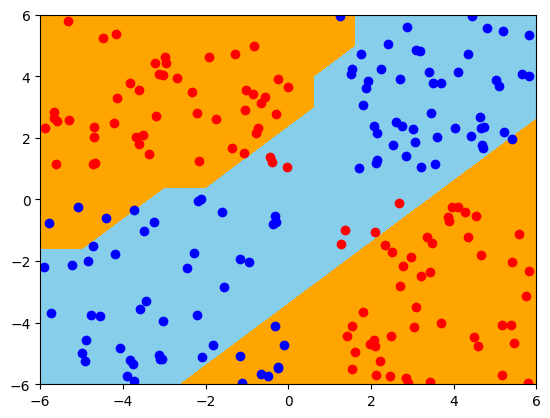

In [27]:
xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)
xx1, xx2 = torch.meshgrid(xx1, xx2)
xx1 = xx1.reshape(-1, 1)
xx2 = xx2.reshape(-1, 1)
data = torch.hstack([xx1,xx2])
z = model(data)
z = torch.where(z > 0.5, 1, 0)
z = z.reshape(13,13)

fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red')

Logistic Regression Model

In [28]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        logits = self.linear(x)
        return logits

In [29]:
# Shuffle train and test data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [30]:
X_train = pd.concat([train_data['x1'], train_data['x2'], train_data['x1']**2], axis = 1)
X_train.columns = ['x1','x2','x1^2']
X_train = torch.tensor(X_train.values, dtype= torch.float32)
y_train = train_data['y']
y_train = torch.tensor(y_train.values, dtype= torch.float32)
# y_train

In [31]:
reg = LogisticRegression(3)
opt = torch.optim.Adam(reg.parameters(), lr=0.01)
converged = False

prev_loss = 1e8

i = 0
while not converged:
    opt.zero_grad()
    logits = reg(X_train)
    logits = logits.reshape(-1)
    # print(logits)
    loss = F.binary_cross_entropy_with_logits(logits, y_train)
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item()
    i = i + 1


pred = F.sigmoid(reg(X_train))
pred = torch.where(pred > 0.5 , 1.0, 0.0)
y_train = y_train.reshape(-1, 1)
correct_pred = torch.sum(pred == y_train)
acc = correct_pred / len(y_train)
print(f'Accurcay of Logistic regression using features x1, x2 and square of x1 is {acc}')

0 1.1805530786514282
10 1.0130950212478638
20 0.885844349861145
30 0.7916219234466553
40 0.7343883514404297
50 0.7072486877441406
60 0.6965456604957581
70 0.6933703422546387
Accurcay of Logistic regression using features x1, x2 and square of x1 is 0.4350000023841858


In [32]:
X_train = pd.concat([train_data['x1'], train_data['x2'], train_data['x1']*train_data['x2']], axis = 1)
X_train.columns = ['x1','x2','x1x2']
X_train = torch.tensor(X_train.values, dtype= torch.float32)
y_train = train_data['y']
y_train = torch.tensor(y_train.values, dtype= torch.float32)

reg = LogisticRegression(3)
opt = torch.optim.Adam(reg.parameters(), lr=0.01)
converged = False

prev_loss = 1e8

i = 0
while not converged:
    opt.zero_grad()
    logits = reg(X_train)
    logits = logits.reshape(-1)
    loss = F.binary_cross_entropy_with_logits(logits, y_train)
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item()
    i = i + 1

0 0.14251680672168732
10 0.09878665953874588
20 0.07905939221382141
30 0.06691375374794006
40 0.05858587101101875
50 0.052387069910764694
60 0.047566529363393784
70 0.043699994683265686
80 0.04050657898187637
90 0.037806008011102676
100 0.03548141568899155
110 0.03345236927270889
120 0.031661082059144974
130 0.03006475418806076
140 0.028630854561924934
150 0.027334075421094894
160 0.02615433745086193
170 0.02507544308900833
180 0.02408417873084545
190 0.023169614374637604
200 0.0223226398229599
210 0.02153557352721691
220 0.020801885053515434
230 0.020116006955504417
240 0.019473139196634293
250 0.01886911876499653
260 0.018300339579582214
270 0.01776362583041191
280 0.01725618913769722
290 0.016775567084550858
300 0.01631959155201912
310 0.015886304900050163
320 0.015473980456590652
330 0.015081061981618404
340 0.014706144109368324
350 0.014347979798913002
360 0.014005402103066444
370 0.01367739588022232
380 0.0133630046620965
390 0.013061373494565487
400 0.012771720997989178
410 0.01

In [33]:
pred = F.sigmoid(reg(X_train))
pred = torch.where(pred > 0.5 , 1.0, 0.0)
y_train = y_train.reshape(-1, 1)
correct_pred = torch.sum(pred == y_train)
acc = correct_pred / len(y_train)
print(f'Training accuracy using Logistic Regression {acc}')

Training accuracy using Logistic Regression 1.0


In [34]:
X_test = pd.concat([test_data['x1'], test_data['x2'], test_data['x1']*test_data['x2']], axis = 1)
X_test.columns = ['x1','x2','x1x2']
X_test = torch.tensor(X_test.values, dtype= torch.float32)
y_test = test_data['y1']
y_test = torch.tensor(y_test.values, dtype= torch.float32)


pred = F.sigmoid(reg(X_test))
pred = torch.where(pred > 0.5 , 1.0, 0.0)
y_test = y_test.reshape(-1, 1)
correct_pred = torch.sum(pred == y_test)
acc = correct_pred / len(y_test)
print(f'Testing accuracy using Logistic Regression {acc}')

Testing accuracy using Logistic Regression 1.0


Decision surface of Logistic regression

<ipython-input-35-fd7b8d41f9bd>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
<ipython-input-35-fd7b8d41f9bd>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)


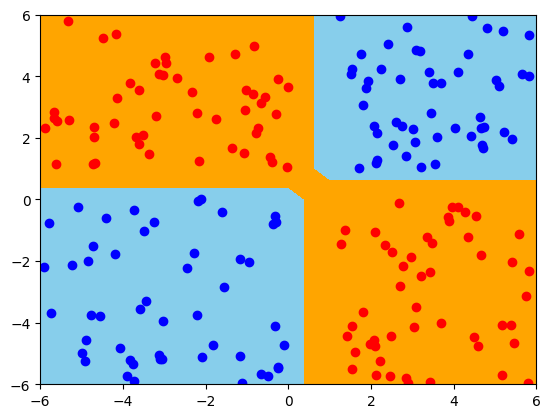

In [35]:
xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)
xx1, xx2 = torch.meshgrid(xx1, xx2)
xx1 = xx1.reshape(-1, 1)
xx2 = xx2.reshape(-1, 1)
xx3 = xx1 * xx2
# print(xx3)
data = torch.hstack([xx1, xx2, xx3 ])
z = reg(data)
z = torch.where(z > 0.5, 1, 0)
z = z.reshape(13,13)

fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red')